# Unemployment In India - ANALYSIS

## Objective
- To analyze the unemployment during covid

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Read Train Data

In [2]:
data=pd.read_csv('Unemployment in India.csv')

In [3]:
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [5]:
data.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [6]:
data=data.dropna()

In [7]:
data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [8]:
data.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


## Finding Outliers

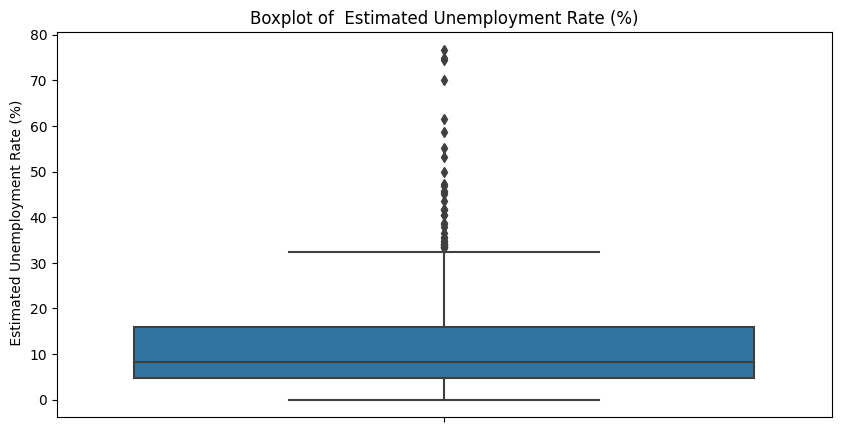

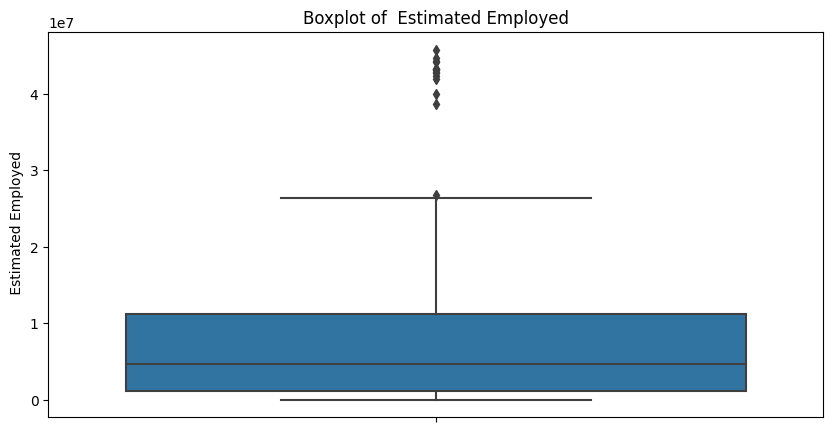

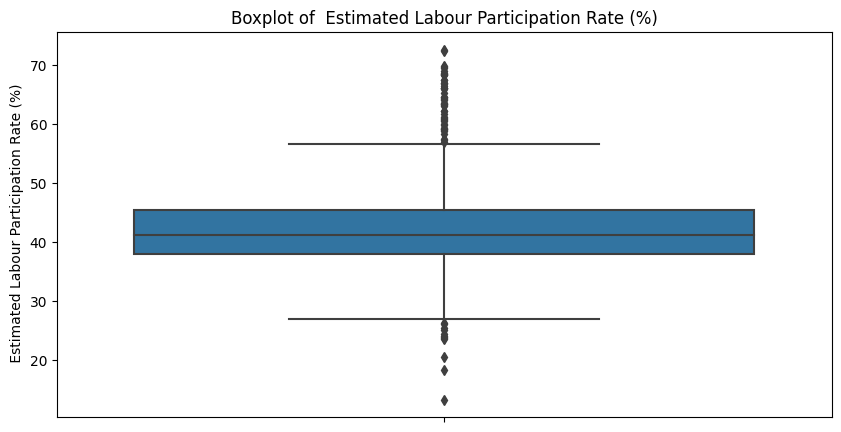

In [11]:
for column in data.columns:
    if data[column].dtype!='object':
        plt.figure(figsize=(10,5))
        sns.boxplot(y=column,data=data)
        plt.ylabel(column)
        plt.title(f'Boxplot of {column}')
        plt.show()

## Handling Outlier

In [12]:
for column in [' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)']:
    if data[column].dtype!='object':
        q1=data[column].quantile(0.25)
        q3=data[column].quantile(0.75)
        IQR=q3-q1
        lower=q1-(IQR*1.5)
        upper=q3+(IQR*1.5)
        data[column]=np.where(data[column]<lower,lower,
                     np.where(data[column]>upper,upper,
                     data[column]))

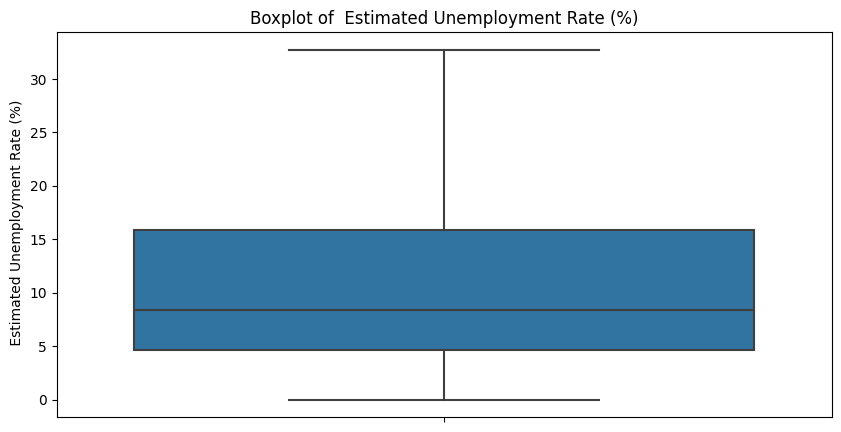

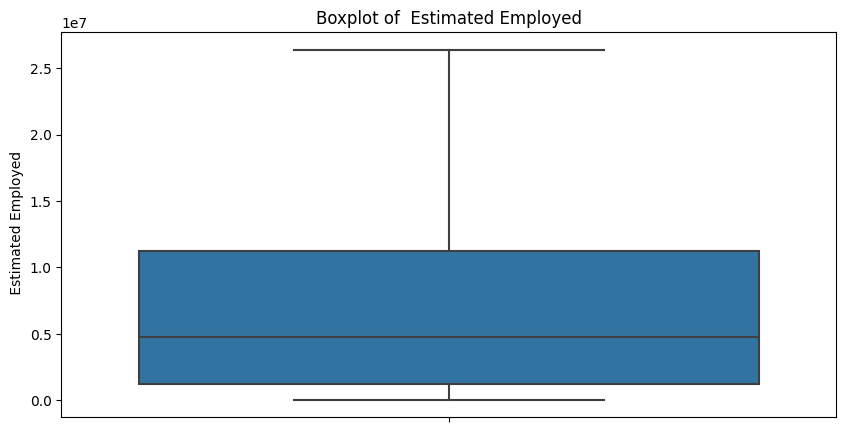

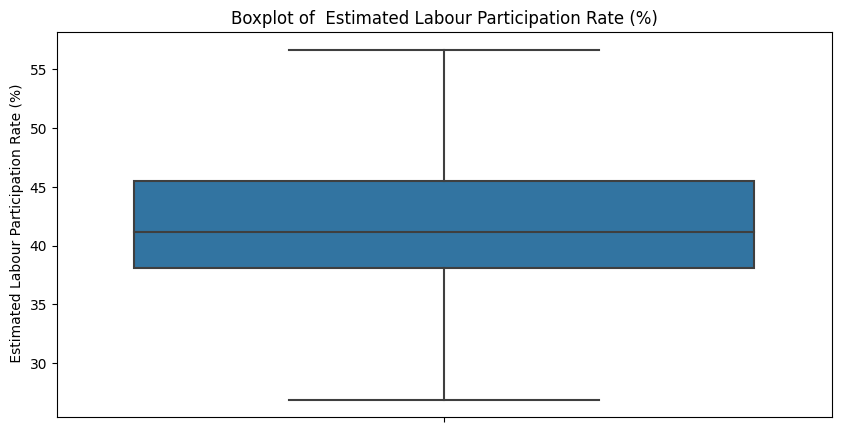

In [13]:
for column in data.columns:
    if data[column].dtype!='object':
        plt.figure(figsize=(10,5))
        sns.boxplot(y=column,data=data)
        plt.ylabel(column)
        plt.title(f'Boxplot of {column}')
        plt.show()

In [14]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.206334,6.892400e+06,42.181475
std,8.676372,6.937256e+06,6.613282
min,0.000000,4.942000e+04,26.898750
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,32.732500,2.640312e+07,56.668750


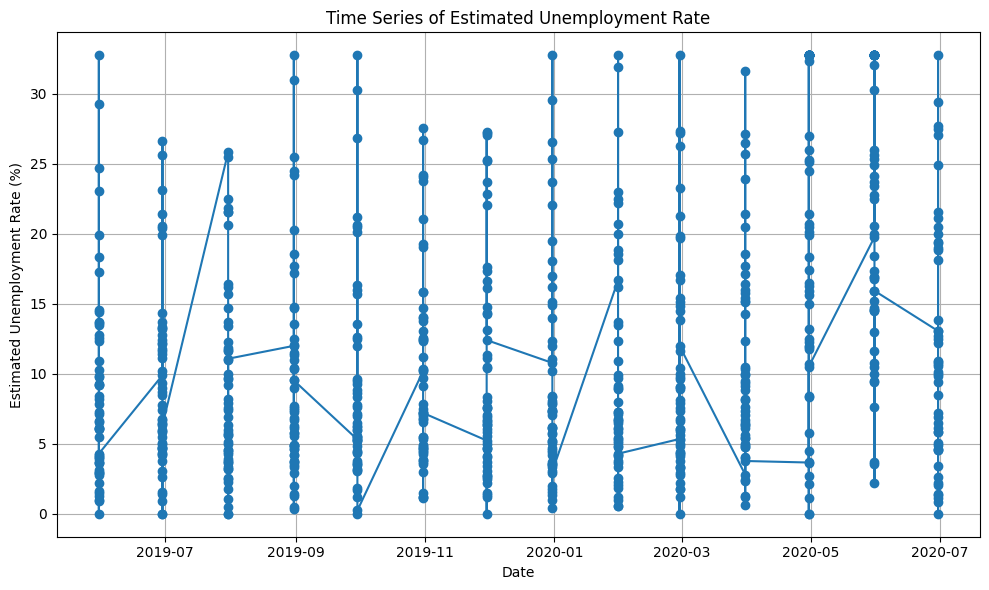

In [15]:
data[' Date']=pd.to_datetime(data[' Date'],dayfirst=True)  

#Sort the DataFrame by date
data=data.sort_values(by=' Date')

plt.figure(figsize=(10, 6))  

plt.plot(data[' Date'],data[' Estimated Unemployment Rate (%)'],marker='o',linestyle='-')
plt.title('Time Series of Estimated Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()

plt.show()

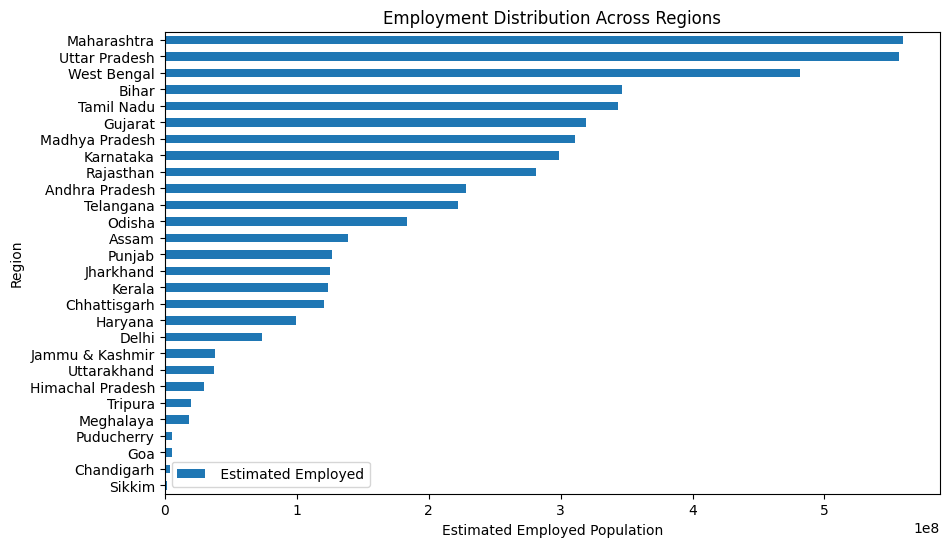

In [16]:
employment_distribution=data.groupby('Region')[' Estimated Employed'].sum().sort_values()

plt.figure(figsize=(10, 6))

employment_distribution.plot(kind='barh')
plt.title('Employment Distribution Across Regions')
plt.xlabel('Estimated Employed Population')
plt.ylabel('Region')
plt.legend()

plt.show()